### Audio Classification

In [1]:
!pip install librosa

* librosa is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems.

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
filename = 'UrbanSound8K/UrbanSound8K/dog_bark.wav'

In [78]:
import IPython.display as ipd # it helps us to display some graphs 
import librosa
import librosa.display
# these are some preprocessing which will help us to display our sound wave

In [79]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is C4FA-E36E

 Directory of C:\Users\Pan18\Desktop\Projects\ML - Urban Sound Classification Project Notes

28-04-2022  14:19    <DIR>          .
28-04-2022  14:19    <DIR>          ..
25-04-2022  13:22    <DIR>          .ipynb_checkpoints
28-04-2022  14:19         1,717,217 URBAN SOUND CLASSIFICATION- Pranay Churamani.ipynb
25-04-2022  13:13    <DIR>          UrbanSound8K
12-07-2018  18:26             4,162 urban_sound_classification.ipynb
               2 File(s)      1,721,379 bytes
               4 Dir(s)  74,389,725,184 bytes free


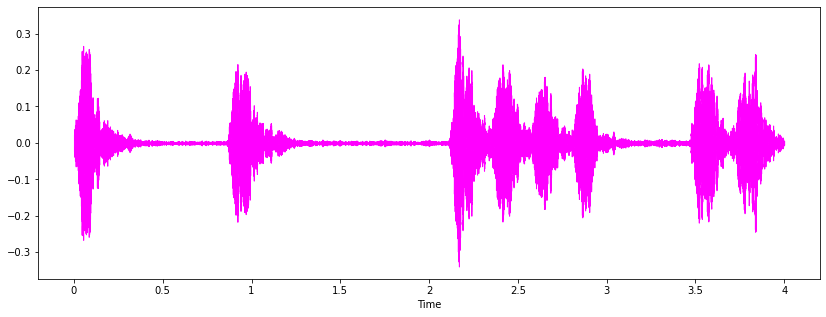

In [80]:
# Dog Sound
plt.figure(figsize = (14,5))
data, sample_rate = librosa.load(filename) # it gives us 2 things, one is data and other is sample rate
librosa.display.waveshow(data, sr = sample_rate, color = 'fuchsia')
ipd.Audio(filename) # ipd.Audio: will helps us to load the audio that is in the form of wave file
# it by default reads the sample rate 

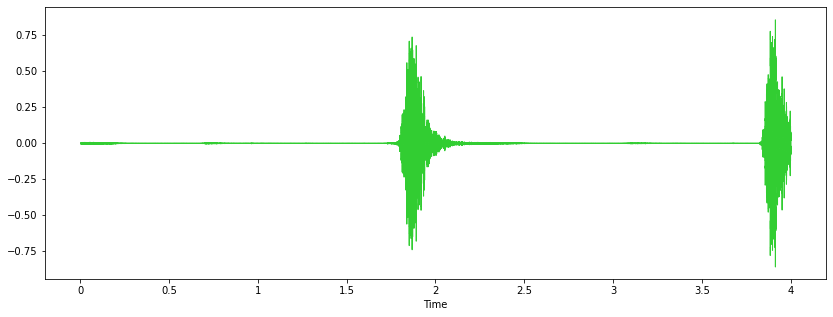

In [81]:
filename = 'UrbanSound8K/UrbanSound8K/102547-3-0-7.wav'
plt.figure(figsize = (14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr = sample_rate, color = 'limegreen')
ipd.Audio(filename)

In [82]:
sample_rate # The sampling rate refers to the number of samples of audio recorded every second.
# 22khz sampling rate 

22050

In [83]:
# when we are reading this information through librosa than we are reading these signals with the sample rate of 22 khz and it
# simply means, through librosa we are reading the dataset with respect to some specific audio and we are getting a 
# sample rate of 22050.

# By default when we are reading with the help of librosa then we are reading these signals with the sample rate of 22050
# It means whenever we are reading some dataset through librosa with respect to some specific audio we are actually getting the sample rate of 22050
# We can read the audio via scipy lib as well

In [84]:
# Different audios different samping rates
# There are 2 channels in an audio:
# 1. Stereo , 2. Mono 
# If we try to read with librosa then it will try to normalize the entire dataset and it will just give
# the data w.r.t a single sample rate 

#### Use scipy

In [85]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)

In [86]:
wave_sample_rate

48000

In [87]:
#so librosa  is bringing a mechanism probabaly it will just read an audio file and try to convert it 
#into a sample rate of 22050. As there are 2 channels one is mono and other is stereo which is basically related to 2 different 
#voices so librosa will try to convert those signals into a mono channel so librosa is very very helpful in these kinds of 
#activities.

In [88]:
wave_audio # in terms of scipy these wave signal values are not getting normalized

array([  -14,   -11,    -5, ..., -2054, -2195, -2348], dtype=int16)

Sound Wave Example

* Each and every signal can be represented by integer values or floating point values
* And when we have these kind of values and we try to combine them then it will show us these signal only
* Any audio signals can be represented in the form of some particular numerical values

In [89]:
data # when we use librosa it is getting normalized between -1 to 1

array([-0.00029672, -0.00011539,  0.00130902, ..., -0.04931118,
       -0.05568155, -0.0708617 ], dtype=float32)

#### librosa is a library which is popularly used for audio signal processing as it helps us to do 2 things:
1. It tries to converge the signals(it will make only 1 signal i.e. mono signal)
2. It can represent an audio signal w.r.t a normalized pattern between -1 to 1 so that a regular pattern is observed from all the audios itself. By default it converts the sample rate into 22 kHz, but in wave file we will see different sample rate as in wavfile we see 44khz 

In [90]:
import pandas as pd
metadata = pd.read_csv('UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10) # this is a labelled dataset 

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


#### Check whether the dataset is imbalanced

In [91]:
metadata['class'].value_counts() 
# it is not an imbalanced dataset as most categories are having good amount of data

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [92]:
#meta data : It contains the mapping of the audio files wrt the folders and file names.

### Audio Classification Data Preprocessing

* Whenever we read any audio signal we get 2 channels, the audio may be recorded in mono or stereo channel
* Audios will be saved within a specific sample rate 
* librosa will keep the sample rate in 21 kHz and the audio data will be normalized within -1 to 1 so  that we can see the data in a normalized pattern
* Once we get the specific data, now we need to extract some important information and then we have to keep our dataset in the form of independent and dependent features, here the independent features should be the extracted features from the audio signals and the dependent features need to be the class label names

In [93]:
# Let's read a sample audio using librosa 
import librosa
audio_file_path = 'UrbanSound8K/UrbanSound8K/106487-5-0-2.wav'
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [94]:
print(librosa_audio_data)
# by default librosa converts any audio data into 1 channel i.e. mono channel
# In mono channel there will be just one dimension of information so there will not be 2 features, in
# mono there will be 1 signal

[ 0.02803584  0.03781578  0.03671949 ...  0.00110145  0.00375066
 -0.00190335]


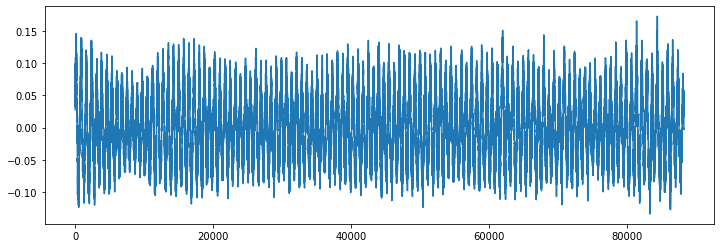

In [95]:
# Let's plot the librosa audio data 
import matplotlib.pyplot as plt
# Original audio with one channel 
plt.figure(figsize = (12,4))
plt.plot(librosa_audio_data)

#this shows how the data is distributed

**Let's see how the 2 channels will look like**

* In scipy we have wavfile and this library reads the audio path, it will keep that particular path in whichever channel it is.

* Here we will use scipy and in scipy we have something called wavfile, In this library when it reads audio file path, it will keep that particular file path in which the ever channel it is. So usualy an audio file may have a single channel or it may also have a double channel so a single channel is called as mono and audio file with 2 channels is called as stereo.

In [96]:
# Let's read with scipy 
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [97]:
wave_audio 

array([[ 948, 1380],
       [1206, 1402],
       [1057, 1226],
       ...,
       [ 282, -102],
       [  39, -236],
       [ -89, -251]], dtype=int16)

**OBSERVATION**

* Here we are having 2 features or 2 Dimensions (2D), so in case of librosa we have only one feature which is normalized between -1 to 1 but here we have 2 channels and with the help of 2 channels we are just checking out that this will be the info that is by default given by this particular wav file. So librosa by default converts that into a mono channel.

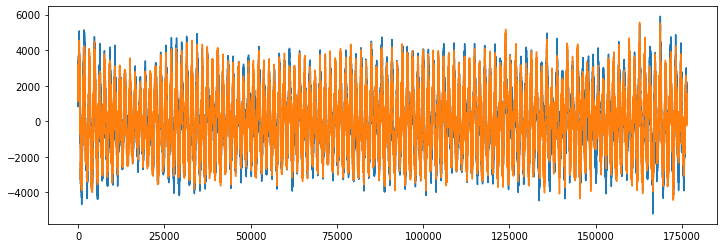

In [98]:
import matplotlib.pyplot as plt
# Original audio with 2 channels
plt.figure(figsize = (12,4))
plt.plot(wave_audio) # this is a stereo channel

* We are getting this type of graph and this is because of 2 channels or stereo channel.

In [25]:
# We will take these signals and try to create some independent features which will represent that 
# particular audio data 

* In order to create independent features by taking this mono signal which will be representing the particular audio data and It is the most important task. For this we have a technique called as "Mel-Frequency Cepstral coefficients" (MFCC). This is a heavy technique wrt audio signal processing.

#### Extract Features

* Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarizes the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification. It will try to convert the audio into some kind of features based on the frequency and time characteristics which will help us to do the classification.


* MFCC does nothing but extracting patterns based on the frequency and time characterstics. This will uniquely able to identify that particular audio signal like in which class it actually belongs to because this audio signal will be later used in  deep learning Techniues

In [99]:
mfccs = librosa.feature.mfcc(y = librosa_audio_data, sr = librosa_sample_rate, n_mfcc = 40)
print(mfccs.shape)
# Audio signals were converted into array of dimension (40,173)

(40, 173)


In [100]:
mfccs
# These are the patterns which have been extracted based on the frequency and time characteristics
# This will uniquely identify which class the audio signal belongs to 

array([[-2.4480911e+02, -2.1912628e+02, -2.2298322e+02, ...,
        -2.3195135e+02, -2.3062483e+02, -2.4823630e+02],
       [ 8.6309952e+01,  8.2176666e+01,  8.7063538e+01, ...,
         8.2634254e+01,  8.8408264e+01,  9.1313675e+01],
       [ 2.1068704e+00,  3.5957088e+00,  1.8186946e+00, ...,
         1.3550342e+00, -9.5429873e-01,  3.2561123e-01],
       ...,
       [ 9.5050735e+00,  5.4310193e+00,  2.4724526e+00, ...,
         6.9005594e+00,  5.4421959e+00,  4.5178618e+00],
       [ 2.5074263e+00,  1.2793858e+00,  3.7857132e+00, ...,
         4.7205114e+00,  2.2114410e+00, -2.1687612e-02],
       [ 4.4890327e+00,  4.6858625e+00,  6.7775874e+00, ...,
         8.8837471e+00,  1.0351014e+01,  9.6306744e+00]], dtype=float32)

In [101]:
#There are 8000 files and we need to apply all this particular things to all these files.
# Extracting MFCC's for every audio file 
import pandas as pd
import os
import librosa

audio_dataset_path = 'UrbanSound8K/UrbanSound8K/audio/'
# metadata file has the mapping w.r.t the folder and the file name
metadata = pd.read_csv('UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


* This feature extractor is a function which takes a file_name and then we are going to use the librosa.load and once we do this it is going to take 2 information i.e. audio and the sample rate then we are going to use 'librosa.feature.mfcc' and we are going to give it different parameters and in order to find out the scaled features, we will be doing a mean on the transpose of the particular value that we are getting. 

* res_type : str
  resample type.
  
  By default, this uses resampy’s high-quality mode (‘kaiser_best’).

In [102]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type = 'kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)
    
    return mfccs_scaled_features

**The above function is for 1 audio file and to do it for all the files, we have to iterate over the whole csv file.**

* metadata.iterrows() : It will help us to iterate over all the rows.

In [103]:
import numpy as np
from tqdm import tqdm
# Now we iterate through every audio file and extract features
# Using Mel-Frequency Cepstral Coefficients
extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), "fold"+str(row["fold"])+"/",str(row["slice_file_name"]))
    final_class_labels = row["class"]
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])
    # We append it because we will convert this into a dataframe 
    # Mel-Frequency Cepstral Coefficients will extract some important information based on frequency
    # and time data 

3554it [03:10, 19.49it/s]C:\Users\Pan18\anaconda3\envs\tf\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8326it [06:58, 29.06it/s]C:\Users\Pan18\anaconda3\envs\tf\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\Pan18\anaconda3\envs\tf\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [07:15, 20.04it/s]


In [104]:
# converting extracted features to Pandas dataframe
extracted_features_df = pd.DataFrame(extracted_features, columns = ['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-218.18938, 71.38549, -131.49442, -52.25892, ...",dog_bark
1,"[-425.05234, 110.67095, -54.192833, 62.045406,...",children_playing
2,"[-459.82623, 122.82864, -47.908062, 53.302677,...",children_playing
3,"[-414.82184, 102.94826, -36.656853, 54.170742,...",children_playing
4,"[-447.60776, 115.08627, -53.74607, 61.55309, 1...",children_playing


* tolist () : used to convert the data elements of an array into a list.

In [105]:
# Split the dataset into independent and dependent dataset
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [106]:
print(X)
print()
print(y)

[[-218.18938      71.38549    -131.49442    ...   -1.5696381
    -0.75472176    0.53398454]
 [-425.05234     110.67095     -54.192833   ...    0.6308662
    -0.67027247    0.59634036]
 [-459.82623     122.82864     -47.908062   ...    2.194272
     1.5538614    -0.7991639 ]
 ...
 [-304.84702     112.69567     -47.21992    ...   -3.0244384
     2.6847007     7.674591  ]
 [-345.06885     126.78658     -56.18254    ...   -7.8130603
    -1.766159      5.8158836 ]
 [-316.331        95.86536     -38.176315   ...    0.6094481
   -11.483956     -5.9417224 ]]

['dog_bark' 'children_playing' 'children_playing' ... 'car_horn'
 'car_horn' 'car_horn']


In [107]:
X.shape #There are 8732 records

(8732, 40)

In [35]:
y = np.array(pd.get_dummies(y)) #Convert categorical variable into dummy/indicator variables.

In [36]:
y[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [37]:
y.shape

(8732, 10)

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [39]:
X_train # independent features 

array([[-1.3211458e+02,  1.1391494e+02, -2.3927406e+01, ...,
         3.3260243e+00, -1.4790288e+00,  2.8912871e+00],
       [-1.4296137e+01,  9.1951004e+01, -8.6025953e+00, ...,
        -3.3708370e+00, -5.2008624e+00, -1.5975088e+00],
       [-4.9827820e+01,  1.8449357e-01, -2.0364500e+01, ...,
         2.0259936e+00, -8.3159238e-01,  2.7930872e+00],
       ...,
       [-4.2723694e+02,  9.2938095e+01,  2.8287885e+00, ...,
         8.1411356e-01,  6.6066748e-01,  7.8365982e-01],
       [-1.4640692e+02,  1.3716916e+02, -3.4362492e+01, ...,
         1.3839475e+00, -1.9667517e+00, -8.8792092e-01],
       [-4.2171307e+02,  2.1160454e+02,  2.5852380e+00, ...,
        -5.1338639e+00, -3.6135261e+00, -1.3413876e+00]], dtype=float32)

In [40]:
y # for the independent features y represent our output class 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [41]:
X_train.shape

(6985, 40)

In [42]:
X_test.shape

(1747, 40)

In [43]:
y_train.shape

(6985, 10)

In [44]:
y_test.shape # we have 10 features as we have 10 classes

(1747, 10)

### Model Creation

In [45]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [47]:
# Number of classes
num_labels = y.shape[1]

#### Steps

* We will create an Artificial Neural Network(ANN) with 3 dense layers 
* We give the input shape w.r.t the number of features 
* Then we apply the activation function in the 1st layer 
* Then we will apply our model Dropout to avoid overfitting
* Similarly we create 2 more layers
* Our output layers will be a dense layer of number of classes
* And then we will apply softmax function on output layer as this is a multiclass classification problem
* we are going to create ANN with 3 dense layers.
* input_shape is (40,) for first dense layer because in our training dataset we have 40 features so we usually give input shape wrt the no. of features.
* why dropout is actually used : To avoid overfitting

In [48]:
model = Sequential()

# first layer
model.add(Dense(100, input_shape = (40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# third layer 
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [50]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

**ModelCheckpoint:**
* Callback to save the Keras model or model weights at some frequency. ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

* **save_best_only:** if save_best_only=True, it only saves when the model is considered the "best" and the latest best model according to the quantity monitored will not be overwritten. 

**datetime:**
* The datetime module supplies classes for manipulating dates and times.

* While date and time arithmetic is supported, the focus of the implementation is on efficient attribute extraction for output formatting and manipulation.

**HDF is an acronym for Hierarchical Data Format. HDF5 is HDF Version 5.**

#### Training my model

In [53]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'UrbanSound8K/UrbanSound8K/audio_classification.hdf5',
                               verbose = 1, save_best_only = True)
start = datetime.now()

model.fit(X_train, y_train, batch_size = num_batch_size, epochs = num_epochs, validation_data = (X_test, y_test), callbacks = [checkpointer])

duration = datetime.now() - start
print("Training Completed in time:", duration)

Epoch 1/100
219/219 [==============================] - 1s 5ms/step - loss: 0.9813 - accuracy: 0.6752 - val_loss: 0.8091 - val_accuracy: 0.7487

Epoch 00001: val_loss improved from inf to 0.80913, saving model to UrbanSound8K/UrbanSound8K\audio_classification.hdf5
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 1.0036 - accuracy: 0.6617 - val_loss: 0.8058 - val_accuracy: 0.7464

Epoch 00002: val_loss improved from 0.80913 to 0.80582, saving model to UrbanSound8K/UrbanSound8K\audio_classification.hdf5
Epoch 3/100
219/219 [==============================] - 1s 5ms/step - loss: 0.9825 - accuracy: 0.6667 - val_loss: 0.7946 - val_accuracy: 0.7504

Epoch 00003: val_loss improved from 0.80582 to 0.79460, saving model to UrbanSound8K/UrbanSound8K\audio_classification.hdf5
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 1.0078 - accuracy: 0.6597 - val_loss: 0.8296 - val_accuracy: 0.7350

Epoch 00004: val_loss did not improve from 0.79460
Epoch

219/219 [==============================] - 1s 5ms/step - loss: 0.9342 - accuracy: 0.6885 - val_loss: 0.7587 - val_accuracy: 0.7682

Epoch 00078: val_loss did not improve from 0.71773
Epoch 79/100
219/219 [==============================] - 1s 5ms/step - loss: 0.9167 - accuracy: 0.6915 - val_loss: 0.7185 - val_accuracy: 0.7779

Epoch 00079: val_loss did not improve from 0.71773
Epoch 80/100
219/219 [==============================] - 1s 5ms/step - loss: 0.9199 - accuracy: 0.6833 - val_loss: 0.7425 - val_accuracy: 0.7630

Epoch 00080: val_loss did not improve from 0.71773
Epoch 81/100
219/219 [==============================] - 1s 5ms/step - loss: 0.9162 - accuracy: 0.6875 - val_loss: 0.7487 - val_accuracy: 0.7624

Epoch 00081: val_loss did not improve from 0.71773
Epoch 82/100
219/219 [==============================] - 1s 5ms/step - loss: 0.9060 - accuracy: 0.7005 - val_loss: 0.7147 - val_accuracy: 0.7728

Epoch 00082: val_loss improved from 0.71773 to 0.71469, saving model to UrbanSound8K

In [54]:
test_accuracy = model.evaluate(X_test, y_test, verbose = 0)
print(str(test_accuracy[1] * 100) + '%') 

77.9049813747406%


In [ ]:
# prediction_features : This func will help us to get the features from the func 'feature_extractor'

In [67]:
filename = 'UrbanSound8K/UrbanSound8K/dog_bark.wav'
prediction_feature = features_extractor(filename)
prediction_feature = prediction_feature.reshape(1,-1)
print(prediction_feature.shape)

model.predict(prediction_feature) # use model.predict() to extract the class probabilities.

(1, 40)


array([[0.01208693, 0.21792333, 0.0244842 , 0.07783427, 0.01464388,
        0.01240013, 0.00519314, 0.00085905, 0.00960958, 0.6249655 ]],
      dtype=float32)

In [70]:
predictions = np.argmax(model.predict(prediction_feature), axis = -1)
predictions # array([9]) is the values present in our classes

array([9], dtype=int64)

In [71]:
predictions = np.argmax(model.predict(prediction_feature))
predictions # it has predicted the 9th class for us 

9

In [73]:
# to check the numbers corresponding to different classes:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

### Testing Some Test Audio

* we have created an ANN model and we have trained that specific model for the audio classification and there we got 78.82 % of  validation accuracy which is pretty much good.


* we have extracted information from the audio with the help of MFCC.

Steps

* preprocess the new audio data, wherein we need to extract the features from that specific data itself using mfccc
* predict the classes (we need to predict the class labels with the help of the model, this model will give us the label and then we will try to inverse transform the label to get the class name)
* Inverse transform your predicted label

**Whenever we need to work with the test data, we also need to inverse transform from that label to the class name**

In [108]:
# Label Encoding
# y = np.array(pd.get_dummies(y))
# Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))
# When we use fit_transform y will get converted into class labels and total number of classes are 10
# After that we convert this using to_categorical which will give us dummy variables w.r.t the number
# of features
# We use this instead of pd.get_dummies() as we can use this label encoder to work with test data

#### Points

In [ ]:
#The filename is in the form of wav that basically means it is an audio file
# we are getting the audio and the sample rates
# Then we are applying mffc to get the features
# For one audio file, we are going to reshape it to (1, -1) and it denotes 1 row with 40 features of value
# Then we are predicting the labels, labels means to which label it belongs to whether it is 0,1,2 or to which class it belongs 
#to.

#Then to get the class name, we are going to do the inverse transform of our labels and we have used the label encoder instead
#of using get_dummies.

#finally we get the predict class

#### Test Case-1

#### check for another file since there is 78.8% accuracy so few predictions might be wrong:

In [112]:
filename = 'UrbanSound8K/UrbanSound8K/gunshot.wav'
audio, sample_rate = librosa.load(filename, res_type = 'kaiser_fast')
mfccs_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label = np.argmax(model.predict(mfccs_scaled_features), axis = -1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[-1.9353737e+02  7.7716286e+01 -2.5340664e+01  1.4290144e+01
 -1.3701927e+01  1.1724936e+01 -6.2726798e+00  1.8337257e+01
 -1.9391096e+00  1.6346546e+01  6.9373976e-03  1.1160462e+01
 -1.4441367e+00  8.4565744e+00 -3.3957837e+00  4.9120493e+00
 -1.7030212e+00  5.3711414e+00 -2.8163056e+00  4.2826209e+00
 -6.6488004e-01  4.4869823e+00 -3.0697921e-01  4.0884342e+00
 -1.4053111e+00  1.8816978e+00  6.6870236e-01  3.3567457e+00
  9.7199559e-01  2.3005304e+00  5.3528577e-01  1.3486577e+00
 -9.6529871e-02  3.2308309e+00  8.5588133e-01  1.9354119e+00
 -8.3271056e-02 -2.7412808e-01 -1.5555280e+00  5.3060210e-01]
[[-1.9353737e+02  7.7716286e+01 -2.5340664e+01  1.4290144e+01
  -1.3701927e+01  1.1724936e+01 -6.2726798e+00  1.8337257e+01
  -1.9391096e+00  1.6346546e+01  6.9373976e-03  1.1160462e+01
  -1.4441367e+00  8.4565744e+00 -3.3957837e+00  4.9120493e+00
  -1.7030212e+00  5.3711414e+00 -2.8163056e+00  4.2826209e+00
  -6.6488004e-01  4.4869823e+00 -3.0697921e-01  4.0884342e+00
  -1.4053111e+00 

array(['children_playing'], dtype='<U16')

#### Test Case-2

In [113]:
filename = 'UrbanSound8K/UrbanSound8K/barking.wav'
audio, sample_rate = librosa.load(filename, res_type = 'kaiser_fast')
mfccs_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1) # here we have 1 row and 40 features
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape) # we have 40 features with 1 row of all those features
predicted_label = np.argmax(model.predict(mfccs_scaled_features), axis = -1)
print(predicted_label) # here we are getting the label
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[-4.7558084e+02  4.0967636e+01  5.0231485e+00 -3.9158597e+00
 -3.5055661e+00  1.0125847e-01 -5.1216760e+00 -7.9595983e-01
 -1.8934656e+00 -3.1926594e+00 -4.1104412e-01  1.5625374e+00
  1.2270056e+00  2.5141921e+00 -1.0219722e+00 -3.4291658e-01
  1.8680557e+00  2.3886483e+00  2.1487920e+00  3.1480970e+00
  3.6338663e+00  2.0321898e+00  5.3576696e-01  1.2842263e-01
 -1.4258581e-01 -7.3364621e-01  2.1921323e-01  1.6445674e+00
  1.3114830e+00 -4.4752714e-01 -4.9259993e-01  4.2884818e-01
  3.7649176e-01 -3.2434562e-01  8.9653768e-03  3.5825405e-01
  2.1185528e-02 -3.5774595e-01  2.2602724e-01  7.6576799e-01]
[[-4.7558084e+02  4.0967636e+01  5.0231485e+00 -3.9158597e+00
  -3.5055661e+00  1.0125847e-01 -5.1216760e+00 -7.9595983e-01
  -1.8934656e+00 -3.1926594e+00 -4.1104412e-01  1.5625374e+00
   1.2270056e+00  2.5141921e+00 -1.0219722e+00 -3.4291658e-01
   1.8680557e+00  2.3886483e+00  2.1487920e+00  3.1480970e+00
   3.6338663e+00  2.0321898e+00  5.3576696e-01  1.2842263e-01
  -1.4258581e-01 

array(['dog_bark'], dtype='<U16')

#### Test Case-3

In [114]:
filename = 'UrbanSound8K/UrbanSound8K/street_music.wav'
audio, sample_rate = librosa.load(filename, res_type = 'kaiser_fast')
mfccs_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label = np.argmax(model.predict(mfccs_scaled_features), axis = -1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[-8.3291786e+01  8.4052711e+01 -2.0025089e+01 -5.3709674e-01
 -8.1908112e+00  5.9740815e+00 -1.8180492e+01  6.5593529e+00
 -1.9235167e+01  1.0926594e+01 -1.6927422e+01  8.8431158e+00
 -1.4970873e+01  7.1948032e+00 -1.4442536e+01  1.7062238e+00
 -1.4762275e+01  2.6848011e+00 -5.8443236e+00  5.3422518e+00
 -6.0509696e+00 -1.4577056e+00 -1.2483207e+01 -6.2341309e+00
 -9.8377256e+00  2.2791588e+00  7.7711374e-01  3.0993040e+00
 -7.6711392e+00 -2.9436717e+00 -4.4684930e+00  7.6874167e-02
 -3.3158836e+00 -9.9788916e-01 -7.6815658e+00 -1.5946132e+00
  2.4584444e-02  9.3788826e-01 -5.4570470e+00 -2.4391515e+00]
[[-8.3291786e+01  8.4052711e+01 -2.0025089e+01 -5.3709674e-01
  -8.1908112e+00  5.9740815e+00 -1.8180492e+01  6.5593529e+00
  -1.9235167e+01  1.0926594e+01 -1.6927422e+01  8.8431158e+00
  -1.4970873e+01  7.1948032e+00 -1.4442536e+01  1.7062238e+00
  -1.4762275e+01  2.6848011e+00 -5.8443236e+00  5.3422518e+00
  -6.0509696e+00 -1.4577056e+00 -1.2483207e+01 -6.2341309e+00
  -9.8377256e+00 

array(['street_music'], dtype='<U16')

#### Conclusion

* This project gives us some good accuracy